# Correlation between replicate samples

In [1]:
import scanpy as sc
import numpy as np
import os
from scipy.io import mmread
import pandas as pd
import seaborn as sns
import matplotlib as mpl
from collections import Counter

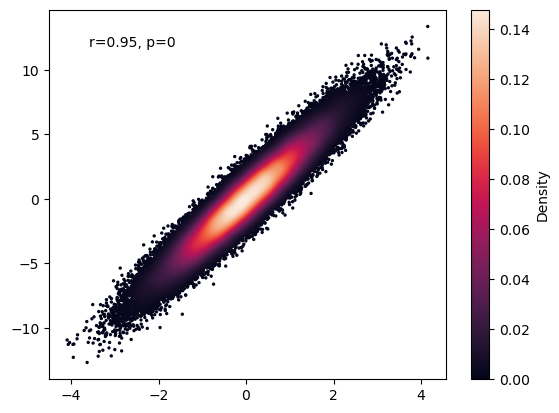

In [2]:
# 生成样例数据
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import Normalize 
from scipy.interpolate import interpn

def density_scatter( x , y, ax = None, sort = True, bins = 20, **kwargs )   :
    """
    Scatter plot colored by 2d histogram
    """
    global fig
    if ax is None :
        fig , ax = plt.subplots()
    data , x_e, y_e = np.histogram2d( x, y, bins =bins, density = True )
    z = interpn( ( 0.5*(x_e[1:] + x_e[:-1]) , 0.5*(y_e[1:]+y_e[:-1]) ) , data , np.vstack([x,y]).T , method = "splinef2d", bounds_error = False)

    #To be sure to plot all data
    z[np.where(np.isnan(z))] = 0.0

    # Sort the points by density, so that the densest points are plotted last
    if sort :
        idx = z.argsort()
        x, y, z = x[idx], y[idx], z[idx]

    ax.scatter( x, y, c=z, s=2,cmap='rocket', **kwargs )

    norm = Normalize(vmin = np.min(z), vmax = np.max(z))
    cbar = fig.colorbar(cm.ScalarMappable(norm = norm, cmap='rocket'), ax=ax)
    cbar.ax.set_ylabel('Density')

    # annotate with PCC and P-value
    r, p = stats.pearsonr(x, y)
    ax.text(.1, .9, 'r={:.2f}, p={:.2g}'.format(r, p),
            transform=ax.transAxes)
    
    return ax

if "__main__" == __name__ :

    x = np.random.normal(size=100000)
    y = x * 3 + np.random.normal(size=100000)
    density_scatter(x, y, bins = [30,30] )

## 10x vs scCAT celltype correlation

In [3]:
counts_10x_Nonneuron = pd.read_csv('./Brain/10x_cortex_Nonneuron.csv',index_col=0)
counts_CAT_Nonneuron = pd.read_csv('./Brain/CAT_cortex_Nonneuron.csv',index_col=0)
counts_10x_Excitneuron = pd.read_csv('./Brain/10x_cortex_Excitneuron.csv',index_col=0)
counts_CAT_Excitneuron = pd.read_csv('./Brain/CAT_cortex_Excitneuron.csv',index_col=0)
counts_10x_Inhibitneuron = pd.read_csv('./Brain/10x_cortex_Inhibitneuron.csv',index_col=0)
counts_CAT_Inhibitneuron = pd.read_csv('./Brain/CAT_cortex_Inhibitneuron.csv',index_col=0)

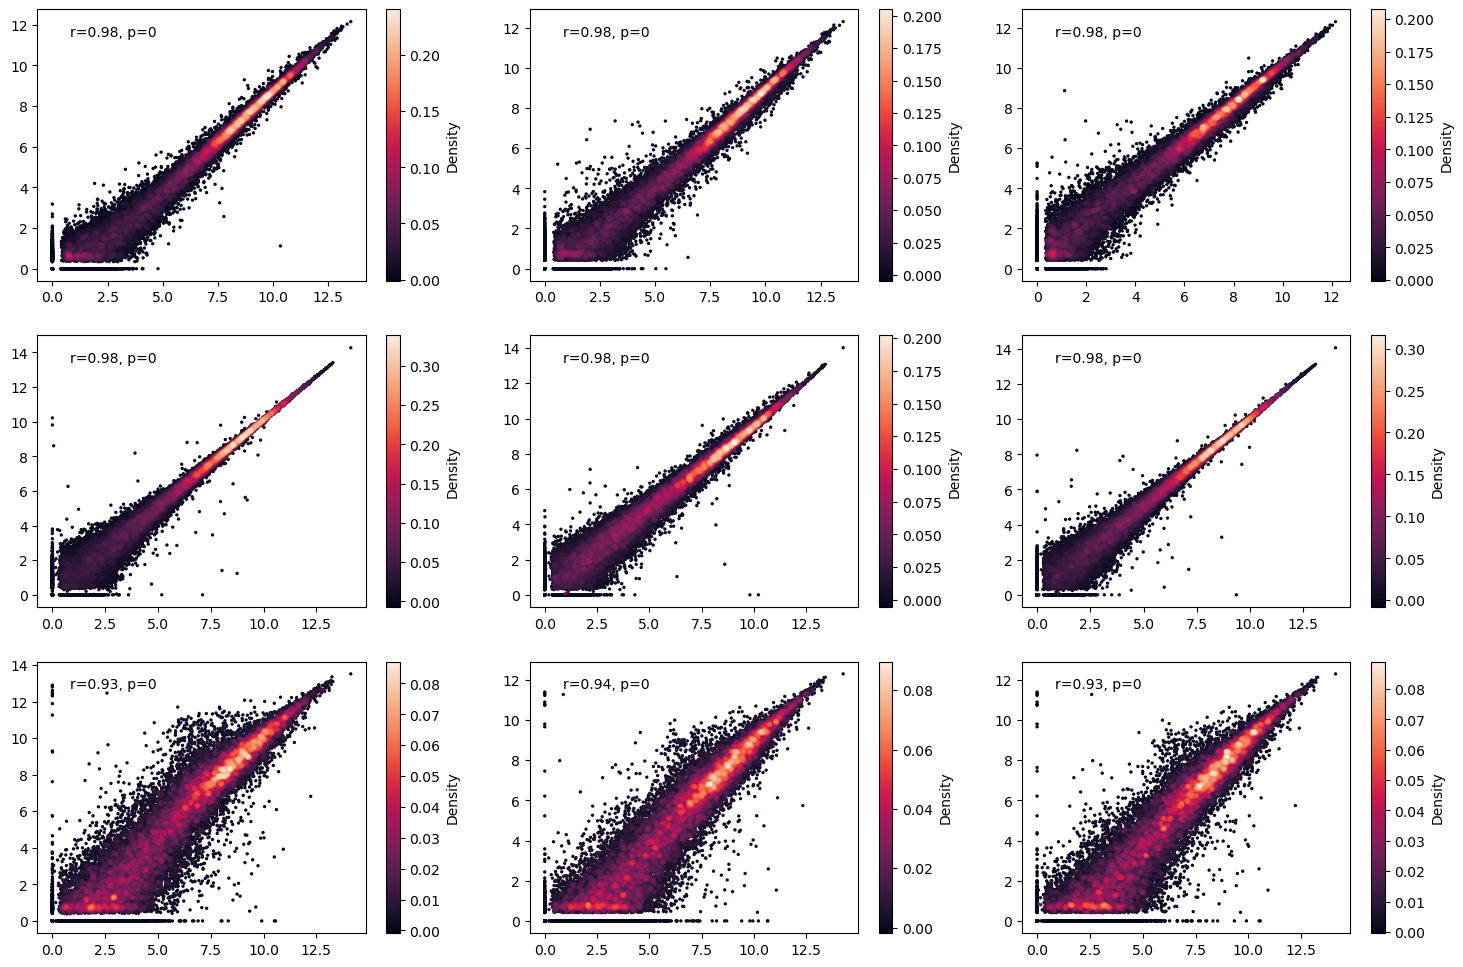

In [4]:
# Excitatory neuron
fig, axis = plt.subplots(3, 3, figsize=(18,12))
axis[0][0]=density_scatter(counts_10x_Excitneuron['10X_multi_1'], counts_10x_Excitneuron['10X_multi_3'], ax= axis[0][0], bins = [100, 100] )
axis[0][1]=density_scatter(counts_10x_Excitneuron['10X_multi_1'], counts_10x_Excitneuron['10X_multi_4'],ax= axis[0][1], bins = [100, 100] )
axis[0][2]=density_scatter(counts_10x_Excitneuron['10X_multi_3'], counts_10x_Excitneuron['10X_multi_4'],ax= axis[0][2], bins = [100, 100] )
axis[1][0]=density_scatter(counts_CAT_Excitneuron['EL13'], counts_CAT_Excitneuron['EL14'], ax= axis[1][0], bins = [100, 100] )
axis[1][1]=density_scatter(counts_CAT_Excitneuron['EL14'], counts_CAT_Excitneuron['EL15'],ax= axis[1][1], bins = [100, 100] )
axis[1][2]=density_scatter(counts_CAT_Excitneuron['EL15'], counts_CAT_Excitneuron['EL16'],ax= axis[1][2], bins = [100, 100] )
axis[2][0]=density_scatter(counts_CAT_Excitneuron['EL13'], counts_10x_Excitneuron['10X_multi_1'], ax= axis[2][0], bins = [100, 100] )
axis[2][1]=density_scatter(counts_CAT_Excitneuron['EL14'], counts_10x_Excitneuron['10X_multi_4'],ax= axis[2][1], bins = [100, 100] )
axis[2][2]=density_scatter(counts_CAT_Excitneuron['EL13'], counts_10x_Excitneuron['10X_multi_4'],ax= axis[2][2], bins = [100, 100] )
plt.savefig('./Brain/Mcortex_10xvsscCAT_Excitatory_neuron.pdf')

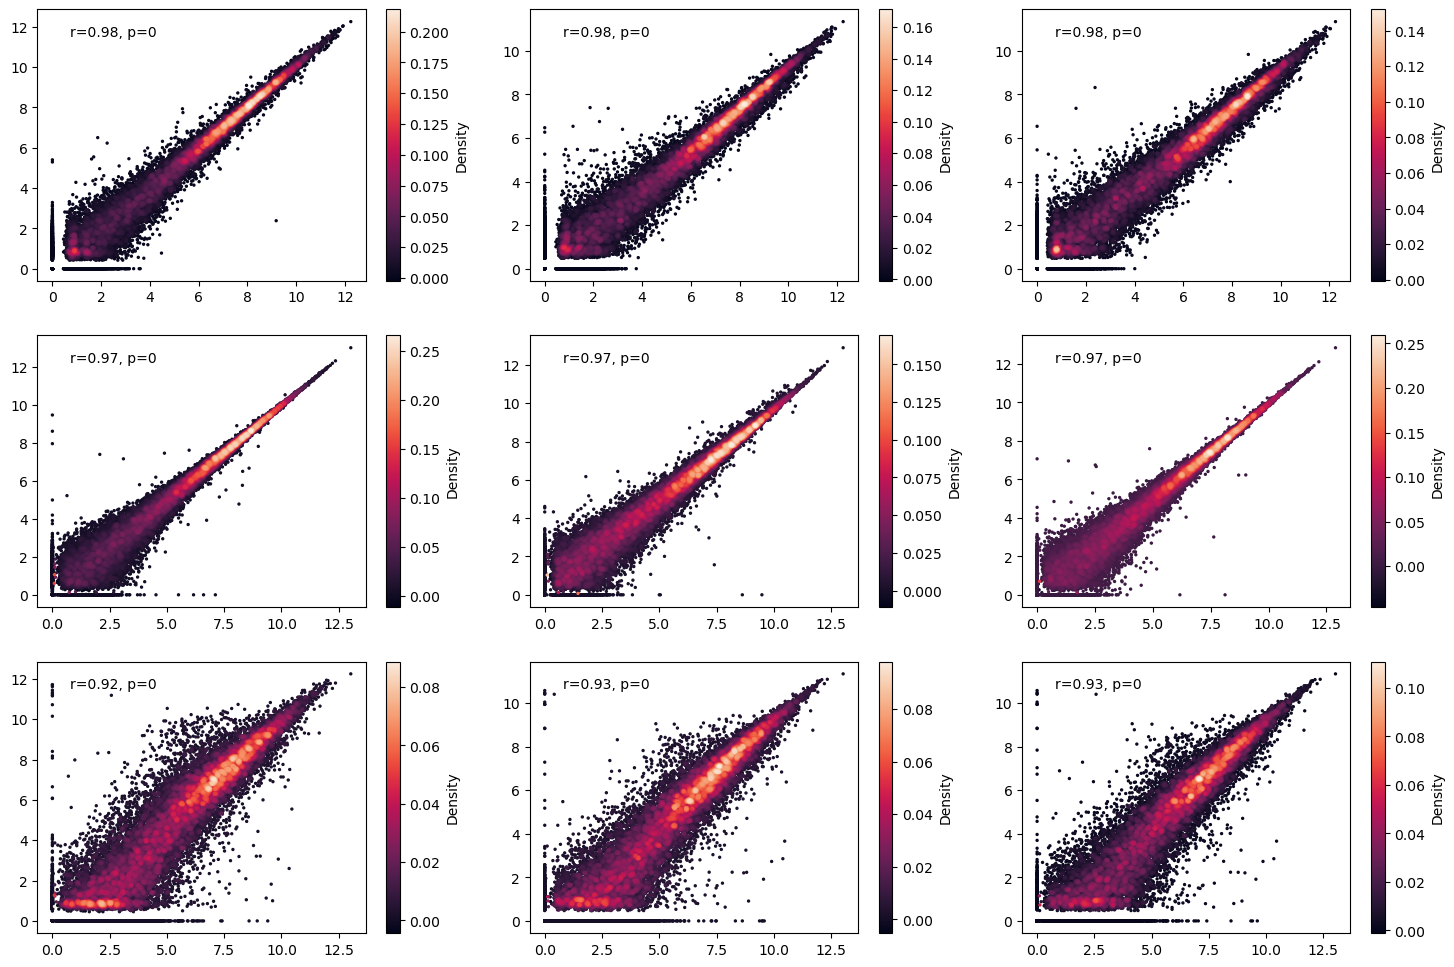

In [5]:
# Inhibitory neuron
fig, axis = plt.subplots(3, 3, figsize=(18,12))
axis[0][0]=density_scatter(counts_10x_Inhibitneuron['10X_multi_1'], counts_10x_Inhibitneuron['10X_multi_3'], ax= axis[0][0], bins = [100, 100] )
axis[0][1]=density_scatter(counts_10x_Inhibitneuron['10X_multi_1'], counts_10x_Inhibitneuron['10X_multi_4'],ax= axis[0][1], bins = [100, 100] )
axis[0][2]=density_scatter(counts_10x_Inhibitneuron['10X_multi_3'], counts_10x_Inhibitneuron['10X_multi_4'],ax= axis[0][2], bins = [100, 100] )
axis[1][0]=density_scatter(counts_CAT_Inhibitneuron['EL13'], counts_CAT_Inhibitneuron['EL14'], ax= axis[1][0], bins = [100, 100] )
axis[1][1]=density_scatter(counts_CAT_Inhibitneuron['EL14'], counts_CAT_Inhibitneuron['EL15'],ax= axis[1][1], bins = [100, 100] )
axis[1][2]=density_scatter(counts_CAT_Inhibitneuron['EL15'], counts_CAT_Inhibitneuron['EL16'],ax= axis[1][2], bins = [100, 100] )
axis[2][0]=density_scatter(counts_CAT_Inhibitneuron['EL13'], counts_10x_Inhibitneuron['10X_multi_1'], ax= axis[2][0], bins = [100, 100] )
axis[2][1]=density_scatter(counts_CAT_Inhibitneuron['EL14'], counts_10x_Inhibitneuron['10X_multi_4'],ax= axis[2][1], bins = [100, 100] )
axis[2][2]=density_scatter(counts_CAT_Inhibitneuron['EL13'], counts_10x_Inhibitneuron['10X_multi_4'],ax= axis[2][2], bins = [100, 100] )
plt.savefig('./Brain/Mcortex_10xvsscCAT_Inhibitory_neuron.pdf')

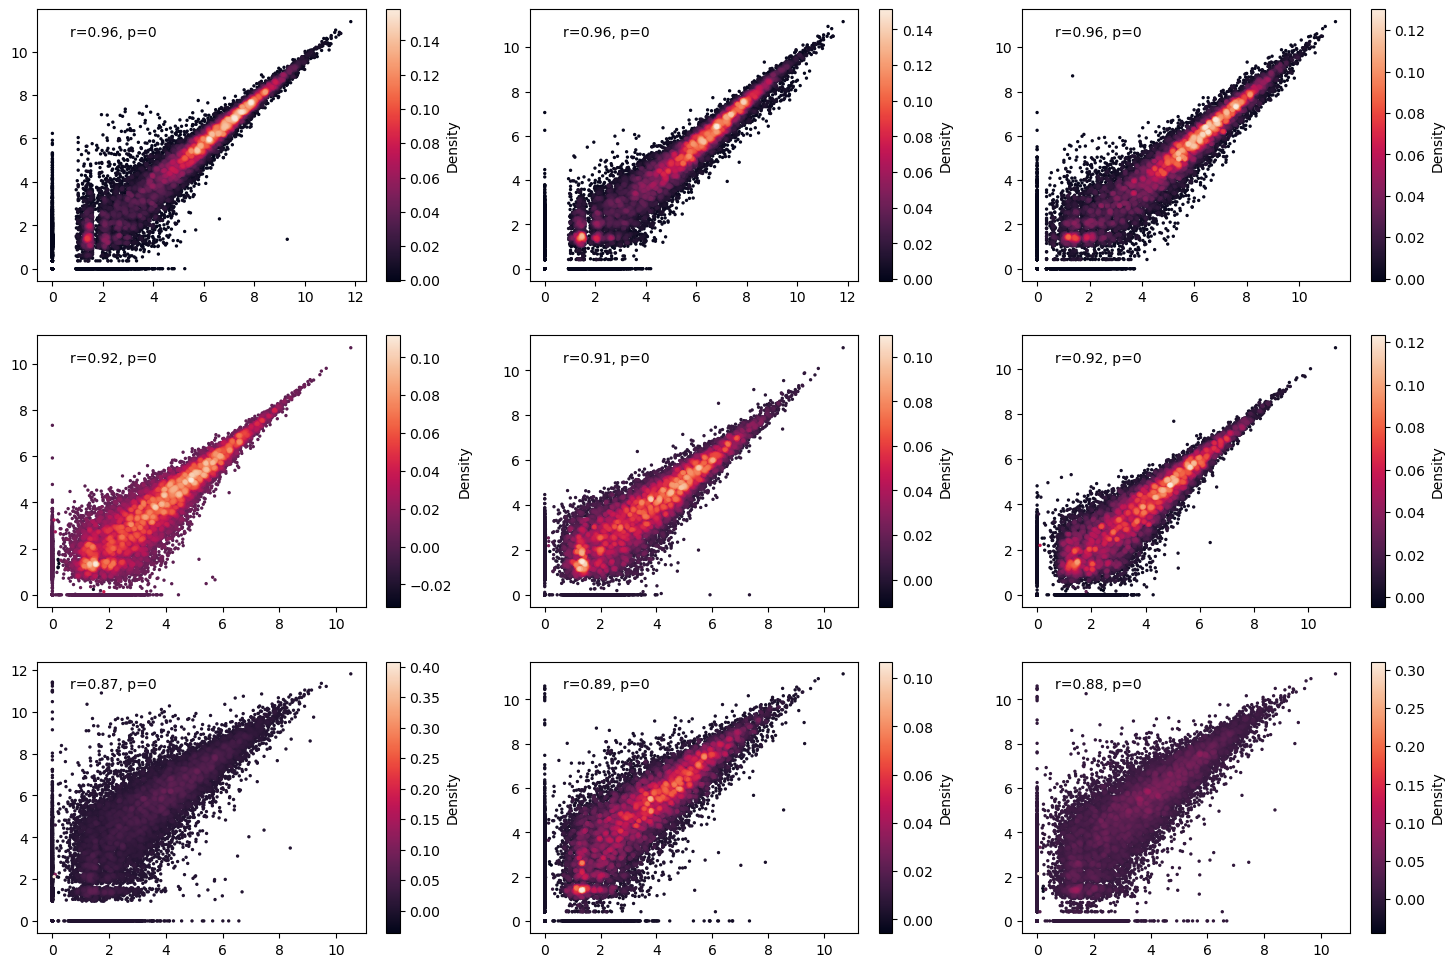

In [6]:
# Nonneuron
fig, axis = plt.subplots(3, 3, figsize=(18,12))
axis[0][0]=density_scatter(counts_10x_Nonneuron['10X_multi_1'], counts_10x_Nonneuron['10X_multi_3'], ax= axis[0][0], bins = [100, 100] )
axis[0][1]=density_scatter(counts_10x_Nonneuron['10X_multi_1'], counts_10x_Nonneuron['10X_multi_4'],ax= axis[0][1], bins = [100, 100] )
axis[0][2]=density_scatter(counts_10x_Nonneuron['10X_multi_3'], counts_10x_Nonneuron['10X_multi_4'],ax= axis[0][2], bins = [100, 100] )
axis[1][0]=density_scatter(counts_CAT_Nonneuron['EL13'], counts_CAT_Nonneuron['EL14'], ax= axis[1][0], bins = [100, 100] )
axis[1][1]=density_scatter(counts_CAT_Nonneuron['EL14'], counts_CAT_Nonneuron['EL15'],ax= axis[1][1], bins = [100, 100] )
axis[1][2]=density_scatter(counts_CAT_Nonneuron['EL15'], counts_CAT_Nonneuron['EL16'],ax= axis[1][2], bins = [100, 100] )
axis[2][0]=density_scatter(counts_CAT_Nonneuron['EL13'], counts_10x_Nonneuron['10X_multi_1'], ax= axis[2][0], bins = [100, 100] )
axis[2][1]=density_scatter(counts_CAT_Nonneuron['EL14'], counts_10x_Nonneuron['10X_multi_4'],ax= axis[2][1], bins = [100, 100] )
axis[2][2]=density_scatter(counts_CAT_Nonneuron['EL13'], counts_10x_Nonneuron['10X_multi_4'],ax= axis[2][2], bins = [100, 100] )
plt.savefig('./Brain/Mcortex_10xvsscCAT_Nonneuron.pdf')

# celltype correlation (spearman corr)

In [7]:
import os
from scipy.io import mmread
import scanpy as sc
import numpy as np

In [8]:
rna_corr = pd.read_csv("./Brain/Mcortex_scCAT_rna_celltype_corr.csv",sep=",",header=0,index_col=0)

In [9]:
rna_corr

,Ex_L6_CT,Ex_L6_IT,Ex_NDG_NDST4,Ex_L5_ET,Ex_NDG_NECTIN3,In_HAP1_SCN5A,Ex_L5 IT,In_MGE_PVALB,Ex_L2_3,Ex_L6b,In_CGE_RELN,In_MGE_SST,Ex_L5_6_IT,Dopaminergic_neuron,Astrocyte,Oligodendrocyte,OPC,Endothelia,Microglia,In_PLI
Xkr4,6.652667,6.636392,6.673881,6.604081,6.583405,6.692350,6.699083,6.660691,6.445962,6.511054,6.402887,6.332740,6.209306,6.078489,5.427688,5.981420,6.014993,4.933831,5.560983,5.422286
Gm1992,5.849252,5.868445,5.888667,5.767389,5.799562,5.891579,5.841857,5.836783,5.463063,5.619545,5.422789,5.292280,5.144116,4.753073,3.878584,4.466675,2.728414,0.000000,2.549856,0.000000
Gm19938,5.941191,5.888078,5.878740,5.842113,5.798501,6.028272,5.914224,5.893349,5.682197,5.593141,5.418856,5.336430,4.956322,4.867664,2.719878,3.979930,4.446516,0.000000,3.456832,3.481208
Gm37381,4.685863,3.463214,4.472739,4.680496,3.978884,4.772483,4.573341,4.026626,2.934495,3.362544,3.886213,0.000000,2.874652,0.000000,2.976605,0.000000,0.000000,0.000000,0.000000,0.000000
Rp1,5.138593,5.287899,5.396048,5.343219,5.308484,5.398903,5.292702,5.302725,4.736499,5.006281,4.720875,4.470260,4.445085,4.013862,3.820173,4.047188,2.937245,0.000000,3.478852,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4933409K07Rik,6.648309,6.245530,6.460972,6.566902,6.627290,6.587886,6.167155,5.625396,6.088576,5.282077,4.087441,5.905359,6.094421,3.878315,3.842547,0.000000,3.760552,0.000000,3.972963,3.965603
Gm10931,5.402581,5.439092,3.601374,5.120096,5.780086,3.794260,4.056578,0.000000,0.000000,4.130170,0.000000,0.000000,4.787950,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
CT868723.1,5.852302,6.501418,0.000000,0.000000,7.035106,0.000000,6.412979,5.840661,5.843346,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
CAAA01147332.1,6.264777,6.429019,0.000000,6.529515,6.220184,6.331812,5.556967,5.720691,0.000000,0.000000,0.000000,5.077105,0.000000,0.000000,0.000000,0.000000,5.110803,0.000000,0.000000,0.000000


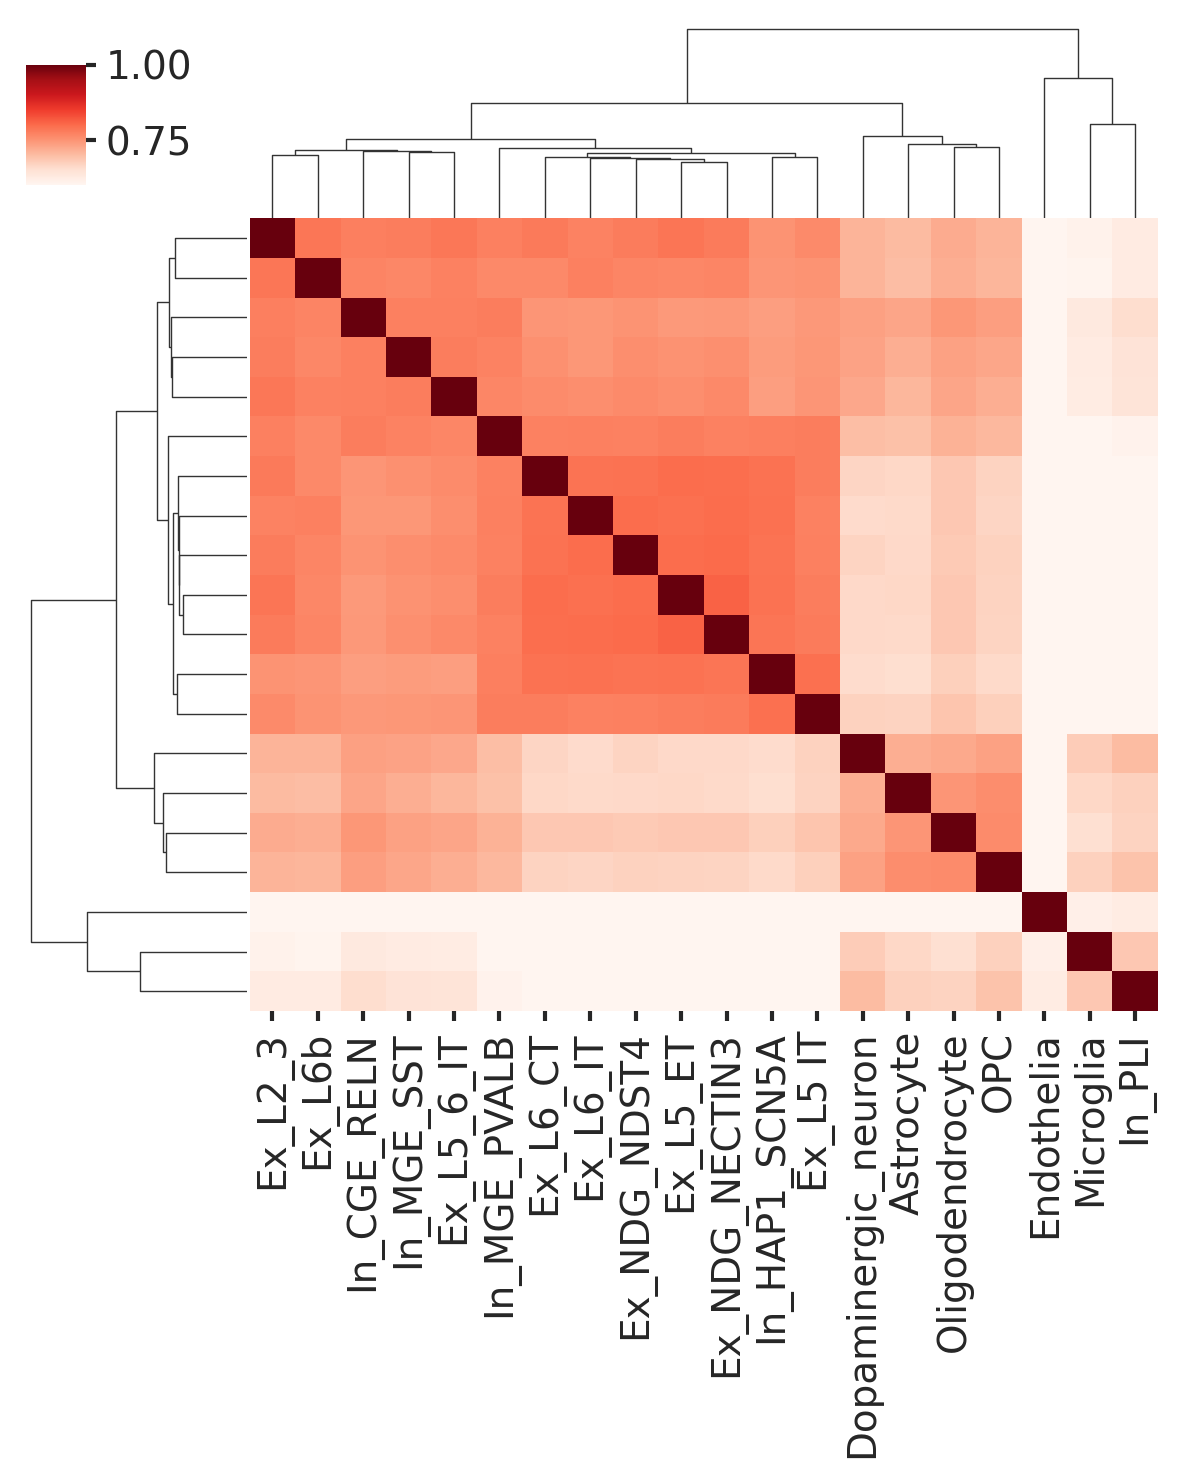

In [10]:
sns.clustermap(rna_corr.corr(),xticklabels=True,yticklabels=False, figsize=(6, 7.5),cmap='Reds', cbar_pos=(0.03, .87, .05, .08), vmin=0.6, vmax=1)
plt.savefig('./Brain/Mcortex_RNA_celltype_correlation.pdf', dpi=600)

In [11]:
atac_corr = pd.read_csv("./Brain/Mcortex_scCAT_atac_celltype_corr.csv",sep=",",header=0,index_col=0)

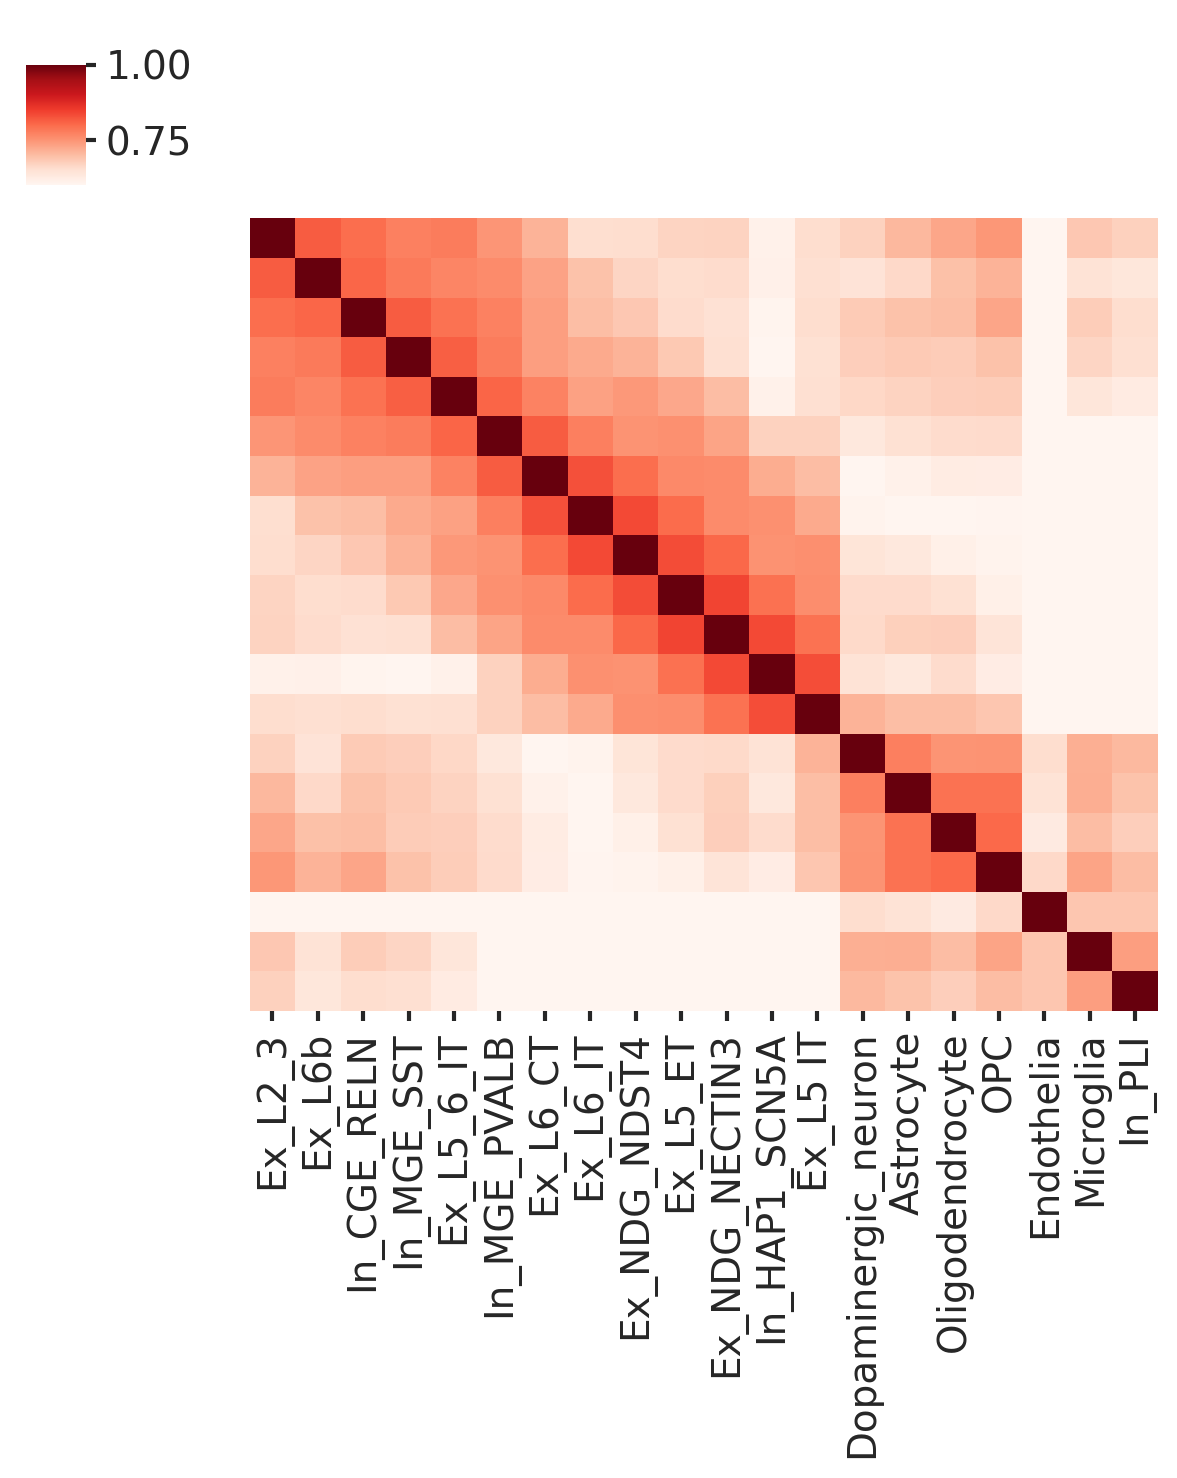

In [12]:
sns.clustermap(atac_corr.corr(),xticklabels=True,yticklabels=False,row_cluster=False,col_cluster=False, figsize=(6, 7.5),cmap='Reds', cbar_pos=(0.03, .87, .05, .08), vmin=0.6, vmax=1)
plt.savefig('./Brain/Mcortex_ATAC_celltype_correlation.pdf', dpi=600)